In [3]:
import cv2
import matplotlib.pyplot as plt

In [9]:
config_file= "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model= "frozen_inference_graph.pb"

In [43]:
model= cv2.dnn_DetectionModel(frozen_model,config_file)

In [11]:
class_labels= []
file_name= "labels.txt"

with open(file_name,'rt') as fpt:
    class_labels= fpt.read().rstrip('\n').split('\n')

In [12]:
print(class_labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [47]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000021AAA66D6B0>

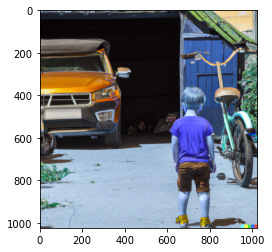

In [25]:
img= cv2.imread('boy.jpg')
plt.imshow(img)

In [26]:
ClassIndex, confidence,bbox= model.detect(img,confThreshold= 0.5)

In [27]:
print(ClassIndex)

[1 2 8 3 2]


In [32]:
font_scale= 3
font=cv2.FONT_HERSHEY_PLAIN
for classInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,class_labels[classInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale= font_scale,color= (0,255,0),thickness=3)

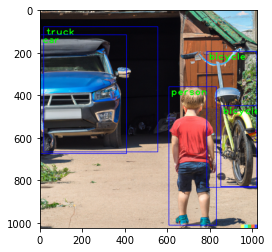

In [33]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Video

In [49]:
model.setInputSize(1920,1080)

< cv2.dnn.Model 0000021AAA927A10>

In [50]:
cap = cv2.VideoCapture("pexels-george-morina-5688492 (1080p).mp4")
if not cap.isOpened():
    cap= cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't Open The Video")
    
    font_scale=3
    font= cv2.FONT.HERSHEY_PLAIN
    
while True:
    ret,frame= cap.read()
    ClassIndex, confidnece,bbox= model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    
    if len(ClassIndex)!=0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(img,boxes,(255,0,0),2)
                cv2.putText(img,class_labels[classInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale= font_scale,color= (0,255,0),thickness=3)
            
            cv2.imshow('Obj Detection By Moin',frame)
            
            if cv2.waitKey(2)&0xff == ord('q'):
                break
                
        cap.release()
        cv2.destroyAllWindows()


[ 1  8 10]


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
